In [3]:
# ASTR 400B Homework 7: M33AnalyticOrbit
# Using Template by Rixin Li & G . Besla
# A function that
# 
# Ryan Lewis
# 4/3/2020

In [4]:
# import necessary modules
# numpy provides powerful multi-dimensional arrays to hold and manipulate data
import numpy as np
# matplotlib provides powerful functions for plotting figures
import matplotlib.pyplot as plt
# astropy provides unit system and constants for astronomical calculations
import astropy.units as u
import astropy.constants as const
# import Latex module so we can display the results with symbols
from IPython.display import Latex

In [8]:
# **** import CenterOfMass to determine the COM pos/vel of M33
from CenterOfMass import CenterOfMass

# **** import the GalaxyMass to determine the mass of M31 for each component
from GalaxyMass import ComponentMass

[['MW COM' '-2.07' '2.95' '-1.45' '0.94' '6.32' '-1.35']
 ['M31 COM' '-377.66' '611.43' '-284.64' '72.85' '-72.14' '49.0']
 ['M33 COM' '-476.22' '491.44' '-412.4' '44.42' '101.78' '142.23']]
Separation between the MW and M31 = 769.0 kpc
Relative Velocity between the MW and M31 = 118.0 km / s
Relative Position between M33 and M31 =  201.0 kpc
Relative Velocity between M33 and M31 =  199.0 km / s
MW halo Mass: 1.975 x 10^12 Msun
MW disk Mass: 0.075 x 10^12 Msun
MW bulge Mass: 0.010 x 10^12 Msun
Total MW Mass: 2.060 x 10^12 Msun
M31 halo Mass: 1.921 x 10^12 Msun
M31 disk Mass: 0.120 x 10^12 Msun
M31 bulge Mass: 0.019 x 10^12 Msun
Total M31 Mass: 2.060 x 10^12 Msun
M33 halo Mass: 0.187 x 10^12 Msun
M33 disk Mass: 0.009 x 10^12 Msun
Total M33 Mass: 0.196 x 10^12 Msun
Total Local Group Mass: 4.316 x 10^12 Msun


In [50]:
# Class to calculate the analytical orbit of M33 around M31
class M33AnalyticOrbit:
    
    # Function that initializes the instances of the class MassProfile
    def __init__(self, filename):
        # Input:
            # filename - the name of the output file
        # Outputs:
            # None - (Function is used for initialization purposes only)

        ### get the gravitational constant (the value is 4.498502151575286e-06)
        self.G = const.G.to(u.kpc**3/u.Msun/u.Gyr**2).value
        
        ### store the output file name
        self.filename = filename
        
        ### get the current pos/vel of M33 
        # Create an instance of the  CenterOfMass class for M33 
        M33COM = CenterOfMass("M33_000.txt", 2)

        # Store the position VECTOR of the M33 COM (.value to get rid of units)
        M33_COMP = M33COM.COM_P(0.1).value
        

        # Store the velocity VECTOR of the M33 COM (.value to get rid of units)
        M33_COMV = M33COM.COM_V(M33_COMP[0],  M33_COMP[1],  M33_COMP[2])
        
        ### get the current pos/vel of M31 
        # Create an instance of the  CenterOfMass class for M31 
        M31COM = CenterOfMass("M31_000.txt", 2)

        # Store the position VECTOR of the M31 COM (.value to get rid of units)
        M31_COMP = M31COM.COM_P(0.1).value
        

        # Store the velocity VECTOR of the M31 COM (.value to get rid of units)
        M31_COMV = M31COM.COM_V(M31_COMP[0],  M31_COMP[1],  M31_COMP[2]).value
        
        
        ### store the DIFFERENCE between the vectors posM33 - posM31
        # Create two VECTORs self.r0 and self.v0 and have them be the
        # relative position and velocity VECTORS of M33
        self.r0 = M33_COMP - M31_COMP
        self.v0 = M33_COMV - M31_COMV
        
        ### get the mass of each component in M31
        
        ### disk
        # self.rdisk = scale length (no units)
        self.rdisk = 5
        
        # self.Mdisk set with ComponentMass function. Remember to *1e12 to get the right units. Use the right ptype
        self.Mdisk = ComponentMass("M31_000.txt", 2) * 1e12
        
        ### bulge
        # self.rbulge = set scale length (no units)
        self.rbulge = 1
        
        # self.Mbulge  set with ComponentMass function. Remember to *1e12 to get the right units Use the right ptype
        self.Mbulge = ComponentMass("M31_000.txt", 3) * 1e12
        
        # Halo
        # self.rhalo = set scale length from HW5 (no units)
        self.rhalo = 61
        
        # self.Mhalo set with ComponentMass function. Remember to *1e12 to get the right units. Use the right ptype
        self.Mhalo = ComponentMass("M31_000.txt", 1) * 1e12
    
    # A function that caluclates the halo or bulge acceleration according to the hernquist profile
    # a = - ((G * M) / rmag * (ra + rmag)**2) * r
    def HernquistAccel(self, M, ra, r): # it is easiest if you take as an input the position VECTOR 
        # Input:
            # M - the total mass of the halo or bulge
            # ra - the scale length
            # r - the relative position vector
        # Output:
            # Hern - the acceleration vector
        
        ### Store the magnitude of the position vector
        rmag = np.sqrt(r[0]**2 + r[1]**2 + r[2]**2)
        
        ### Store the Acceleration
        Hern =  - ((self.G * M) / rmag * (ra + rmag)**2) * r #follow the formula in the HW instructions
        # NOTE: we want an acceleration VECTOR so you need to make sure that in the Hernquist equation you 
        # use  -G*M/(rmag *(ra + rmag)**2) * r --> where the last r is a VECTOR 
        
        return Hern
    
    # A function to determine the disk acceleration using the Miyamoto-Nagai 1975 profile
    # a = - grad(ΦMN(r))
    def MiyamotoNagaiAccel(self, M, rd, r):# it is easiest if you take as an input a position VECTOR  r 
        # Input:
            # M - the total mass of the disk
            # rd - the disk radius
            # r - the relative position vector
        # Output:
            # a - the acceleration vector
        
        ### Acceleration **** follow the formula in the HW instructions
        # AGAIN note that we want a VECTOR to be returned  (see Hernquist instructions)
        # this can be tricky given that the z component is different than in the x or y directions. 
        # we can deal with this by multiplying the whole thing by an extra array that accounts for the 
        # differences in the z direction:
        #  multiply the whle thing by :   np.array([1,1,ZSTUFF]) 
        # where ZSTUFF are the terms associated with the z direction
        
        R = np.sqrt(r[0]**2 + r[1]**2)
        
        zd = rd/5
        Z = np.sqrt(r[2]**2 + zd**2)
        B = rd + Z
        
        ax = -((self.G * M)/(R**2 + B**2)**1.5) * r[0]
        ay = -((self.G * M)/(R**2 + B**2)**1.5) * r[1]
        az = -((self.G * M * B)/((R**2 + B**2)**1.5 * Z)) * r[2]
        
        a = np.array([ax, ay, az])
        
        return a
        # the np.array allows for a different value for the z component of the acceleration
     
    # A function that sums all of the acceleration vectors from each of M31's galaxy components
    def M31Accel(self, r): # input should include the position vector, r
        # Input:
            # r - the relative position vector
        # Output:
            # aTot - the total acceleration vector of M31 at radius r

        ### Call the previous functions for the halo, bulge and disk
        # these functions will take as inputs variable we defined in the initialization of the class like 
        # self.rdisk etc. 
        
        aHalo = self.HernquistAccel(self.Mhalo, self.rhalo, r)
        aBulge = self.HernquistAccel(self.Mbulge, self.rbulge, r)
        aDisk = self.MiyamotoNagaiAccel(self.Mdisk, self.rdisk, r)
        
        aTot = aHalo + aBulge + aDisk
        
        # return the SUM of the output of the acceleration functions - this will return a VECTOR 
        return aTot
    
    
    
    def LeapFrog(self, dt, r, v): # take as input r and v, which are VECTORS. Assume it is ONE vector at a time
        # Input:
            # dt - the timestep
            # r - the relative position vector
            # v - the relative velocity vector
        # Output:
            # rnew - the updated relative poisiton vector
            # vnew - the updated relative velocity vector
        
        # predict the position at the next half timestep
        rhalf = r + v * dt/2
        
        # predict the final velocity at the next timestep using the acceleration field at the rhalf position 
        vnew = v + self.M31Accel(rhalf) * dt
        
        # predict the final position using the average of the current velocity and the final velocity
        # this accounts for the fact that we don't know how the speed changes from the current timestep to the 
        # next, so we approximate it using the average expected speed over the time interval dt. 
        rnew = r + (v + vnew) * dt/2
        
        return rnew, vnew # Return the new position and velcoity vectors
    
    
    
    def OrbitIntegration(self, t0, dt, tmax):
         # Input:
            # t0 - the initial time
            # dt - the timestep
            # tmax - the final time
        # Output:
            # None

        # initialize the time to the input starting time
        t = t0
        
        # initialize an empty array of size :  rows int(tmax/dt)+2  , columns 7
        orbit = np.zeros([int(tmax/dt) + 2, 7])
        
        # initialize the first row of the orbit
        orbit[0] = t0, *tuple(self.r0), *tuple(self.v0)
        # this above is equivalent to 
        # orbit[0] = t0, self.r0[0], self.r0[1], self.r0[2], self.v0[0], self.v0[1], self.v0[2]
        
        
        # initialize a counter for the orbit.  
        i = 1 # since we already set the 0th values, we start the counter at 1
        
        # start the integration (advancing in time steps and computing LeapFrog at each step)
        while (t < tmax):  # as long as t has not exceeded the maximal time 
            
            # advance the time by one timestep, dt
            t += dt
            
            # store the new time in the first column of the ith row
            orbit[i, 0] = t
            
            # ***** advance the position and velocity using the LeapFrog scheme
            # remember that LeapFrog returns a position vector and a velocity vector  
            # as an example, if a function returns three vectors you would call the function and store 
            # the variable like:     a,b,c = function(input)
            r, v = self.LeapFrog(dt, orbit[(i-1), 1:4], orbit[(i-1), 4:])
         
    
            # ****  store the new position vector into the columns with indexes 1,2,3 of the ith row of orbit
            # TIP:  if you want columns 5-7 of the Nth row of an array called A, you would write : 
            # A[n, 5:8] 
            # where the syntax is row n, start at column 5 and end BEFORE column 8
            orbit[i, 1:4] = r
            orbit[i, 4:] = v          
            
            # **** update counter i , where i is keeping track of the number of rows (i.e. the number of time steps)
            i += 1
        
        
        # write the data to a file
        np.savetxt(self.filename, orbit, fmt = "%11.3f"*7, comments='#', 
                   header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                   .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
        
        # there is no return function

In [51]:
M33 = M33AnalyticOrbit("M33AO.txt")
M33.OrbitIntegration(0, 0.1, 10)

data = np.genfromtxt("M33A0.txt", dtype=None, names=True)
T = data["t"]
R = np.sqrt(data["x"]**2 + data["y"]**2 + data["z"]**2)
V = np.sqrt(data["vx"]**2 + data["vy"]**2 + data["vz"]**2)

UnitConversionError: Can only apply 'subtract' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

NameError: name 'T' is not defined

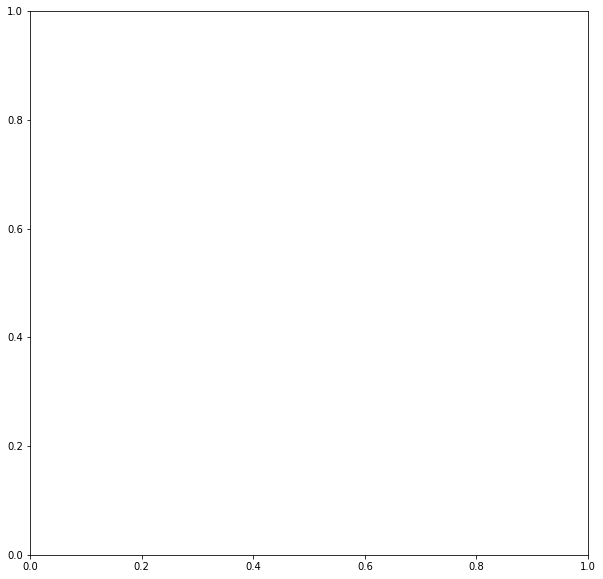

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(T, R, ':', linewidth=4, label='HW7')
plt. title('Orbit of M33 with Respect to M31', fontsize=22)
plt.xlabel('Time (Gyr)', fontsize=18)
plt.ylabel('position (kpc)', fontsize=18)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(T, V, ':', linewidth=4, label='HW7')
plt. title('Orbital Velocity of M33 with Respect to M31', fontsize=22)
plt.xlabel('Time (Gyr)', fontsize=18)
plt.ylabel('Velocity (kpc)', fontsize=18)